In [1]:
import pandas as pd
from collections import defaultdict

In [2]:
processed_bids = pd.read_pickle("../outputs/processed_bids.pkl")
census = pd.read_pickle("../outputs/all_census_data.pkl")
processed_bids = processed_bids.merge(census,how="left", left_on="GEOID", right_on="census_block_group")

In [3]:
bids = pd.read_csv("../data/all_bids.csv")
bidders = bids.groupby("bidder").agg({"t+l_weight":"first", "tier":"first", "latency":"first"}).reset_index()
name_map = {
    "CCO Holdings, LLC":"Charter Communications Inc",
    "Windstream Services LLC, Debtor-In-Possession":"Windstream Holdings, Inc.",
    "Connect Everyone LLC":"Starry, Inc.",
    "Frontier Communications Corporation, DIP":"Frontier Communications Corporation",
    "California Internet, L.P. dba GeoLinks":"GeoLinks",
    "Etheric Communications LLC":"Etheric Networks, Inc.",
    "Consolidated  Communications, Inc.":"Consolidated Communications, Inc.",
    "Frontier Communications Northwest, LLC":"Ziply Fiber",
    "Citynet West Virginia, LLC":"Citynet, LLC",
    "Computer 5, Inc. d/b/a LocalTel Communications": "LocalTel Communications",
    "Armstrong Telephone Company - Northern Division": "Armstrong Holdings, Inc.",
    "Commnet Wireless, LLC": "ATN International, Inc.",
    "Mediacom Communications Corporation": "Mediacom Communications Corp.",
    "Continental Divide Electric Cooperative": "Continental Divide Electric Cooperative, Inc.",
    "South Arkansas Telephone Company": "South Arkansas Telephone Co.",
    "Digital Connections Inc. dba PRODIGI": "Digital Connections, Inc.",
    "Shenandoah Cable Television, LLC": "Shenandoah Telecommunications Company",
    "Direct Communications Rockland, Inc": "Direct Communications Rockland, Inc.",
    "Pine Belt Communications, Inc.":"Pine Belt Communications Co. Inc.",
    "Savage Communications":"Savage Communications Inc.",
    "Hamilton County Telephone Co-op":"Hamilton County Telephone Co-Op",
    "Hotwire Communications, Ltd":"Hotwire Communications Ltd.",
    "Altice USA, Inc.":"Altice",
    "TruVista Communications, Inc.":"TruVista Communications of Georgia, LLC",
    "Hawaii Dialogix Telecom LLC":"Hawaii Dialogix Telecom LLC",
    "Safelink Internet LLC":"Safelink Internet",
    "American Heartland":"Farmers Telephone Company",
    "Cellular Services LLC.":"Cellular Services LLC",
    "Scott County Telephone Cooperative, Inc.":"Scott County",
    "Micrologic Inc.":"Micrologic, Inc.",
    "Pioneer Wireless, Inc":"Pioneer Wireless, Inc.",
    "St. John Telco":"St. John Telephone, Inc.",
    "One Ring Networks, Inc":"One Ring Networks, Inc.",
    "Emery Telephone dba Emery Telcom":"Emery Telcom",
    "XIT Telecommunication & Technology":"XIT Rural Telephone Cooperative, Inc.",
    "Somerset Telephone Co., Inc.":"SOMERSET TELEPHONE COMPANY",
    "Siuslaw Broadband, LLC dba Hyak Technologies":"Siuslaw Broadband, LLC",
    "Minnesota Connections c/o Consolidated Tel Company":"Consolidated Telephone Company",
    "DoCoMo Pacific, Inc.":"Docomo Pacific",
    "Roseau Electric Cooperative, Inc.":"Roseau Electric Cooperative",
    "Custer Telephone Cooperative, Inc.":"Custer Telephone Cooperative Inc.",
    "Lakeland Communications Group, LLC":"Lakeland Communications, Inc.",
    "LigTel Communications, Inc.":"Ligtel Communications",
    "Hamilton Long Distance Company":"Hamilton.net, Inc.",
    "Allen's T.V. Cable Service, Inc.":"Allen's TV Cable Service, Inc.",
    "W. T. Services, Inc.":"W.T. Services, Inc.",
    "Heart of the Catskills Comm. Inc., dba MTC Cable":"MTC Cable",
    "Citizens Vermont Acquisition Corporation":"Citizens Telephone Company",
    "Nova Cablevision, Inc":"Nova Cablevision, Inc.",
    "yondoo Broadband LLC":"yondoo Broadband, LLC",
    "Baraga Telephone Company":"Baraga Telephone Company Inc.",
    "Miles Communications LLC":"Miles Communications, Inc.",
    "PVT NetWorks, Inc.":"Penasco Valley Telephone Cooperative, Inc.",
    "Yucca Telecommunications Systems, Inc.":"Yucca Telecom",
    "H&B Communication's, Inc.":"H&B Enterprises Inc.",
    "MARQUETTE-ADAMS TELEPHONE COOPERATIVE, INC.":"Marquette-Adams Telephone Cooperative, Inc.",
    "Pinpoint Bidding Coalition":"Pinpoint Holdings, Inc.",
    "Computer Techniques, Inc. dba CTI Fiber":"CTI Fiber",
    "Barry Technology Services, LLC":"Barry Technology Services",
    "Bloosurf, LLC":"Bloosurf",
    "St Paul Cooperative Telephone Association":"St Paul Coop Telephone Assoc",
    "Farmers Mutual Cooperative Telephone Company":"FARMERS MUTUAL TELEPHONE COMPANY",
    "NTS Communications, LLC":"NTS, Inc.",
    "Unified Communications Inc.":"Unified Communications, Inc.",
    "Peoples Communication, LLC.":"Peoples Communication, Inc.",
    "Wood County Telephone Company d/b/a Solarus":"Solarus",
    "Comcell Inc.":"Comcell, Inc.",
    "Taylor Telephone Coop., Inc. dba Taylor Telecom":"Taylor Telephone Cooperative, Inc.",
    "Plateau Telecommunications, Incorporated":"Plateau",
    "AMA Communications, LLC":"AMA Communicaitons, L.L.C.",
    "AirCell, Inc.":"AirCell",
    "Bays-ET Highspeed LLC":"Bays-ET Highspeed Internet LLC",
    "Big Bend Telecom LTD":"Big Bend Telephone Company, Inc.",
    "Blue Ridge Cable Technologies, Inc.":"Blue Ridge Cable Technologies, Inc.",
    "Cass Cable TV, Inc.":"Cass Cable TV, Inc.",
    "City of Wilson GreenLight":"City of Wilson",
    "Climax Telephone Company dba CTS Telecom, Inc.":"Climax Telephone Company",
    "Cumberland Telephone Company, Inc":"CUMBERLAND TELEPHONE COMPANY",
    "Cumby Telephone Coooertive, Inc.":"Cumby Telephone Coop., Inc.",
    "Data Stream Mobile Technoligies Inc.":"Data Stream",
    "Get Wireless Inc":"Getwireless.net",
    "Hartington Telecommunications Co., Inc,":"Hartington Telecommunications Co., Inc.",
    "Hilliary Communications Consortium":"Hilliary Communications, LLC",
    "Hillsboro Telephone Company,  Inc.":"Hillsboro Telephone Company",
    "Home Telephone ILEC, LLC":"Home Telephone ILEC, LLC d/b/a Home Telecom",
    "Hood Canal Telephone Co., Inc":"Hood Canal Communications",
    "Kingdom Telecommunications, Inc.":"Kingdom Telecommunications Inc",
    "Lincolnville Communications":"Lincolnville Telephone Company",
    "Local Internet Service Company, Inc.":"Local Internet Service Company",
    "Martell Enterprise  Inc.":"Martell Enterprises, Inc.",
    "Massena Telephone Company, Inc.":"Massena Telephone Company",
    "Moundridge Telephone Company":"Moundridge Telephone Co.",
    "MyServer.org, Inc dba San Diego Broadband":"San Diego Broadband",
    "Newbreak Management, LLC":"Newbreak Communications",
    "NexGenAccess Incorporated":"NexGenAccess",
    "Northwoods Communication Technologies, LLC":"Northwoodsconnect",
    "One Point Technologies Inc":"One Point Technologies Inc.",
    "Panhandle Telecommunication Systems, Inc.":"Panhandle Telephone Cooperative, Inc.",
    "Pathwayz Communications Inc":"Pathwayz Communications, Inc.",
    "RONAN TELEPHONE COMPANY":"Ronan Telephone Co",
    "Rainbow Communications LLC":"Rainbow Telecommunications Association, Inc.",
    "SOUTHWEST ARKANSAS TELEPHONE COOPERATIVE, INC.":"Southwest Arkansas Telephone Cooperative, Inc.",
    "South Central Wireless, Inc.":"South Central Wireless Inc.",
    "Southern Montana Telephone Company (SMTC)":"Southern Montana Telephone Company",
    "Steelville Telephone Exchange Inc.":"Steelville Telephone Exchange Inc",
    "Tekstar Communications, Inc. dba Arvig":"Arvig Enterprises, Inc.",
    "Upsala Cooperative Telephone Association dba Sytek":"UPSALA COOPERATIVE TELEPHONE ASSOCIATION",
    "Valley Telephone Cooperative, Inc":"Valley Telephone Cooperative, Inc.",
    "Velocity.Net Communications, Inc.":"Velocity Communications, Inc.",
    "Woodstock Telephone Co.":"Woodstock Telephone Company",
    "ZIRKEL Wireless, LLC":"Zirkel Wireless",
    "coon valley cooperative telephone association inc.":"Coon Valley Co-op Telephone Association, Inc.",
}

bidders["bidder"] = bidders["bidder"].map(lambda x: name_map[x] if x in name_map else x)

In [4]:
processed_bids.loc[processed_bids.bidder.isin(['Space Exploration Technologies Corp.', 'Viasat, Inc.', 'Hughes Network Systems, LLC']), "neighbor_status"] = 3
processed_bids

,bidder,GEOID,round,all_neighbors,neighbors,winner,won_blocks,geometry,neighbor_status,num_blocks_won,neighbor_bgs,all_neighbor_bgs,census_block_group,B01001e1,B01002e1
0,"1stel, Inc.",10010207001,9,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",0,0,0,11,10010207001,2088,39.4
1,"Hughes Network Systems, LLC",10010207001,13,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",3,0,0,11,10010207001,2088,39.4
2,Simple Networks Systems LLC,10010207001,10,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",0,0,0,11,10010207001,2088,39.4
3,Space Exploration Technologies Corp.,10010207001,13,"{10010202002: {('Charter Communications, Inc.'...",[],True,"[10010207001071, 10010207001073, 10010207001095]","POLYGON ((-86.47038 32.45658, -86.47036 32.456...",3,3,0,11,10010207001,2088,39.4
4,"Viasat, Inc.",10010207001,12,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",3,0,0,11,10010207001,2088,39.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424126,"Hughes Network Systems, LLC",560430002002,12,{560039626001: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.20175 43.82671, -108.20152 43.8...",3,0,0,10,560430002002,1459,48.6
424127,"Plains Internet, LLC",560430002002,10,{560039626001: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.20175 43.82671, -108.20152 43.8...",0,0,0,10,560430002002,1459,48.6
424128,Simple Networks Systems LLC,560430002002,1,{560039626001: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.20175 43.82671, -108.20152 43.8...",0,0,0,10,560430002002,1459,48.6
424129,Space Exploration Technologies Corp.,560430002002,13,{560039626001: {('Mountain West Technologies C...,[],True,"[560430002002314, 560430002002337, 56043000200...","POLYGON ((-108.20175 43.82671, -108.20152 43.8...",3,7,0,10,560430002002,1459,48.6


In [5]:
new_table = defaultdict(dict)
for idx, row in processed_bids.iterrows():
    id = row["GEOID"]
    bidder = row["bidder"]
    if "bidders" not in new_table[id]:
        new_table[id]["bidders"] = dict()

    new_table[id]["bidders"][bidder] = {"neighbors": row["neighbors"], "round": row["round"],
                                        "neighbor_status": row["neighbor_status"]}
    if row["winner"]:
        new_table[id]["winner"] = bidder
        new_table[id]["blocks"] = row["won_blocks"]
        new_table[id]["round"] = row["round"]
        new_table[id]["neighbor_status"] = row["neighbor_status"]
        new_table[id]["all_neighbors"] = row["all_neighbors"]
        new_table[id]["geometry"] = row["geometry"]
        new_table[id]["population"] = row["B01001e1"]
        new_table[id]["age"] = row["B01002e1"]

collapsed_bids = pd.DataFrame.from_dict(new_table , orient='index')
collapsed_bids = collapsed_bids.reset_index().rename(columns={"index":"GEOID"})
collapsed_bids

,GEOID,bidders,winner,blocks,round,neighbor_status,all_neighbors,geometry,population,age
0,10010207001,"{'1stel, Inc.': {'neighbors': [], 'round': 9, ...",Space Exploration Technologies Corp.,"[10010207001071, 10010207001073, 10010207001095]",13.0,3.0,"{10010202002: {('Charter Communications, Inc.'...","POLYGON ((-86.47038099999999 32.456581, -86.47...",2088.0,39.4
1,10010208011,"{'Hughes Network Systems, LLC': {'neighbors': ...",Space Exploration Technologies Corp.,"[10010208011010, 10010208011017, 1001020801102...",13.0,3.0,"{10010206002: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.59549799999999 32.381123, -86.59...",860.0,39.3
2,10010208012,"{'Hughes Network Systems, LLC': {'neighbors': ...",Space Exploration Technologies Corp.,"[10010208012004, 10010208012010, 1001020801201...",13.0,3.0,"{10010201001: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.591984 32.44164, -86.591976 32.4...",2336.0,40.9
3,10010208021,"{'Hughes Network Systems, LLC': {'neighbors': ...",RDOF USA Consortium,"[10010208021003, 10010208021006, 1001020802101...",13.0,0.0,"{10010201001: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.645787 32.554375, -86.6457779999...",3158.0,31.0
4,10010209001,"{'Hughes Network Systems, LLC': {'neighbors': ...",RDOF USA Consortium,"[10010209001000, 10010209001001, 1001020900100...",13.0,0.0,"{10010208021: {('Central Access, Inc.', 'Centr...","POLYGON ((-86.664761 32.627948, -86.6647069999...",1296.0,44.4
...,...,...,...,...,...,...,...,...,...,...
61736,560399676003,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560399676003075, 560399676003087, 56039967600...",13.0,3.0,{160199701001: {('Silver Star Telephone Compan...,"POLYGON ((-111.045492 43.51067099999999, -111....",1731.0,39.8
61737,560399677021,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560399677021047, 560399677021058, 56039967702...",13.0,3.0,"{560399676001: {('Millennium Networks, LLC', '...","POLYGON ((-111.039007 43.472801, -111.036624 4...",1084.0,42.9
61738,560419753001,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,[560419753001107],13.0,3.0,{490439641011: {('COMCAST CABLE COMMUNICATIONS...,"POLYGON ((-111.046818 41.156019, -111.046818 4...",1961.0,40.4
61739,560430002001,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560430002001181, 560430002001513]",13.0,3.0,{560039626002: {('Mountain West Technologies C...,"POLYGON ((-108.550788 44.12770099999999, -108....",777.0,48.0


In [6]:
collapsed_bids = collapsed_bids.merge(bidders, how="left",left_on="winner", right_on="bidder").drop(columns=["bidder"])
collapsed_bids.to_pickle("../outputs/collapsed_bids.pkl")
collapsed_bids

,GEOID,bidders,winner,blocks,round,neighbor_status,all_neighbors,geometry,population,age,t+l_weight,tier,latency
0,10010207001,"{'1stel, Inc.': {'neighbors': [], 'round': 9, ...",Space Exploration Technologies Corp.,"[10010207001071, 10010207001073, 10010207001095]",13.0,3.0,"{10010202002: {('Charter Communications, Inc.'...","POLYGON ((-86.47038099999999 32.456581, -86.47...",2088.0,39.4,20.0,Above Baseline,Low
1,10010208011,"{'Hughes Network Systems, LLC': {'neighbors': ...",Space Exploration Technologies Corp.,"[10010208011010, 10010208011017, 1001020801102...",13.0,3.0,"{10010206002: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.59549799999999 32.381123, -86.59...",860.0,39.3,20.0,Above Baseline,Low
2,10010208012,"{'Hughes Network Systems, LLC': {'neighbors': ...",Space Exploration Technologies Corp.,"[10010208012004, 10010208012010, 1001020801201...",13.0,3.0,"{10010201001: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.591984 32.44164, -86.591976 32.4...",2336.0,40.9,20.0,Above Baseline,Low
3,10010208021,"{'Hughes Network Systems, LLC': {'neighbors': ...",RDOF USA Consortium,"[10010208021003, 10010208021006, 1001020802101...",13.0,0.0,"{10010201001: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.645787 32.554375, -86.6457779999...",3158.0,31.0,0.0,Gigabit,Low
4,10010209001,"{'Hughes Network Systems, LLC': {'neighbors': ...",RDOF USA Consortium,"[10010209001000, 10010209001001, 1001020900100...",13.0,0.0,"{10010208021: {('Central Access, Inc.', 'Centr...","POLYGON ((-86.664761 32.627948, -86.6647069999...",1296.0,44.4,0.0,Gigabit,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61736,560399676003,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560399676003075, 560399676003087, 56039967600...",13.0,3.0,{160199701001: {('Silver Star Telephone Compan...,"POLYGON ((-111.045492 43.51067099999999, -111....",1731.0,39.8,20.0,Above Baseline,Low
61737,560399677021,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560399677021047, 560399677021058, 56039967702...",13.0,3.0,"{560399676001: {('Millennium Networks, LLC', '...","POLYGON ((-111.039007 43.472801, -111.036624 4...",1084.0,42.9,20.0,Above Baseline,Low
61738,560419753001,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,[560419753001107],13.0,3.0,{490439641011: {('COMCAST CABLE COMMUNICATIONS...,"POLYGON ((-111.046818 41.156019, -111.046818 4...",1961.0,40.4,20.0,Above Baseline,Low
61739,560430002001,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560430002001181, 560430002001513]",13.0,3.0,{560039626002: {('Mountain West Technologies C...,"POLYGON ((-108.550788 44.12770099999999, -108....",777.0,48.0,20.0,Above Baseline,Low


In [7]:
def get_number_with_neighbors(cell):
    counter = 0
    for bidder, data in cell.items():
        if data["neighbor_status"] not in [0]: # counts satellites as local competitor always
            counter +=1
    return counter
collapsed_bids["competition bidders"] = collapsed_bids.apply(lambda x: get_number_with_neighbors(x.bidders), axis=1)
collapsed_bids[collapsed_bids["competition bidders"] >=2]

,GEOID,bidders,winner,blocks,round,neighbor_status,all_neighbors,geometry,population,age,t+l_weight,tier,latency,competition bidders
0,10010207001,"{'1stel, Inc.': {'neighbors': [], 'round': 9, ...",Space Exploration Technologies Corp.,"[10010207001071, 10010207001073, 10010207001095]",13.0,3.0,"{10010202002: {('Charter Communications, Inc.'...","POLYGON ((-86.47038099999999 32.456581, -86.47...",2088.0,39.4,20.0,Above Baseline,Low,3
1,10010208011,"{'Hughes Network Systems, LLC': {'neighbors': ...",Space Exploration Technologies Corp.,"[10010208011010, 10010208011017, 1001020801102...",13.0,3.0,"{10010206002: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.59549799999999 32.381123, -86.59...",860.0,39.3,20.0,Above Baseline,Low,3
2,10010208012,"{'Hughes Network Systems, LLC': {'neighbors': ...",Space Exploration Technologies Corp.,"[10010208012004, 10010208012010, 1001020801201...",13.0,3.0,"{10010201001: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.591984 32.44164, -86.591976 32.4...",2336.0,40.9,20.0,Above Baseline,Low,3
3,10010208021,"{'Hughes Network Systems, LLC': {'neighbors': ...",RDOF USA Consortium,"[10010208021003, 10010208021006, 1001020802101...",13.0,0.0,"{10010201001: {('WideOpenWest Finance, LLC', '...","POLYGON ((-86.645787 32.554375, -86.6457779999...",3158.0,31.0,0.0,Gigabit,Low,3
4,10010209001,"{'Hughes Network Systems, LLC': {'neighbors': ...",RDOF USA Consortium,"[10010209001000, 10010209001001, 1001020900100...",13.0,0.0,"{10010208021: {('Central Access, Inc.', 'Centr...","POLYGON ((-86.664761 32.627948, -86.6647069999...",1296.0,44.4,0.0,Gigabit,Low,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61736,560399676003,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560399676003075, 560399676003087, 56039967600...",13.0,3.0,{160199701001: {('Silver Star Telephone Compan...,"POLYGON ((-111.045492 43.51067099999999, -111....",1731.0,39.8,20.0,Above Baseline,Low,3
61737,560399677021,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560399677021047, 560399677021058, 56039967702...",13.0,3.0,"{560399676001: {('Millennium Networks, LLC', '...","POLYGON ((-111.039007 43.472801, -111.036624 4...",1084.0,42.9,20.0,Above Baseline,Low,4
61738,560419753001,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,[560419753001107],13.0,3.0,{490439641011: {('COMCAST CABLE COMMUNICATIONS...,"POLYGON ((-111.046818 41.156019, -111.046818 4...",1961.0,40.4,20.0,Above Baseline,Low,3
61739,560430002001,{'AMG Technology Investment Group LLC': {'neig...,Space Exploration Technologies Corp.,"[560430002001181, 560430002001513]",13.0,3.0,{560039626002: {('Mountain West Technologies C...,"POLYGON ((-108.550788 44.12770099999999, -108....",777.0,48.0,20.0,Above Baseline,Low,3


In [8]:
print("neighbor status all bids")
print(processed_bids["neighbor_status"].value_counts().sort_index())
print("neighbor status winning bids")
print(processed_bids[processed_bids["winner"]]["neighbor_status"].value_counts().sort_index())
print("cbg competition bidders")
print(collapsed_bids["competition bidders"].value_counts().sort_index())
print("finishing round")
print(collapsed_bids["round"].value_counts().sort_index())
print("cbg won")
print((~collapsed_bids["winner"].isna()).value_counts())

neighbor status all bids
0    207299
1     10337
2     24898
3    181597
Name: neighbor_status, dtype: int64
neighbor status winning bids
0    26034
1     2782
2     8939
3    19399
Name: neighbor_status, dtype: int64
cbg competition bidders
0         2
1       149
2      2203
3     34991
4     17056
5      5474
6      1440
7       350
8        66
9         8
10        2
Name: competition bidders, dtype: int64
finishing round
12.0     1893
13.0    32628
14.0     4481
15.0     3686
16.0     2376
17.0     5380
18.0     2252
19.0     4458
Name: round, dtype: int64
cbg won
True     57154
False     4587
Name: winner, dtype: int64


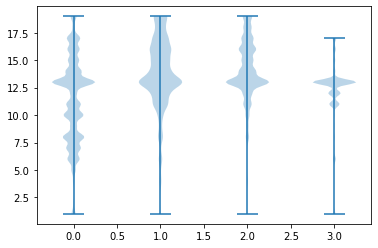

In [9]:
import matplotlib.pyplot as plt
plt.violinplot([processed_bids[processed_bids.neighbor_status==0]["round"].values,
                processed_bids[processed_bids.neighbor_status==1]["round"].values,
                processed_bids[processed_bids.neighbor_status==2]["round"].values,
                processed_bids[processed_bids.neighbor_status==3]["round"].values],
               range(0,4))
plt.show()

In [31]:
collapsed_bids["num_bidders"] = collapsed_bids.apply(lambda x: len(x.bidders), axis =1)
partial_table = collapsed_bids[["GEOID", "num_bidders"]]
processed_bids = processed_bids.merge(partial_table, how="left")

In [32]:
terrestrial = processed_bids[(processed_bids["neighbor_status"] >=0 )& (processed_bids["neighbor_status"] <=2) ].copy()
terrestrial["dummy_1"] = terrestrial.apply(lambda x: x.neighbor_status==1, axis =1)
terrestrial["dummy_2"] = terrestrial.apply(lambda x: x.neighbor_status==2, axis =1)
terrestrial

,bidder,GEOID,round,all_neighbors,neighbors,winner,won_blocks,geometry,neighbor_status,num_blocks_won,neighbor_bgs,all_neighbor_bgs,census_block_group,B01001e1,B01002e1,num_bidders,dummy_1,dummy_2
0,"1stel, Inc.",10010207001,9,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",0,0,0,11,10010207001,2088,39.4,7,False,False
2,Simple Networks Systems LLC,10010207001,10,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",0,0,0,11,10010207001,2088,39.4,7,False,False
5,"Windstream Holdings, Inc.",10010207001,6,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",0,0,0,11,10010207001,2088,39.4,7,False,False
6,Wisper-CABO 904 Consortium,10010207001,10,"{10010202002: {('Charter Communications, Inc.'...",[],False,[],"POLYGON ((-86.47038 32.45658, -86.47036 32.456...",0,0,0,11,10010207001,2088,39.4,7,False,False
8,RDOF USA Consortium,10010208011,12,"{10010206002: {('WideOpenWest Finance, LLC', '...",[],False,[],"POLYGON ((-86.59550 32.38112, -86.59546 32.381...",0,0,0,7,10010208011,860,39.3,7,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424121,"Plains Internet, LLC",560430002001,10,{560039626002: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.55079 44.12770, -108.55073 44.1...",0,0,0,8,560430002001,777,48.0,6,False,False
424122,Simple Networks Systems LLC,560430002001,10,{560039626002: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.55079 44.12770, -108.55073 44.1...",0,0,0,8,560430002001,777,48.0,6,False,False
424125,AMG Technology Investment Group LLC,560430002002,6,{560039626001: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.20175 43.82671, -108.20152 43.8...",0,0,0,10,560430002002,1459,48.6,6,False,False
424127,"Plains Internet, LLC",560430002002,10,{560039626001: {('Mountain West Technologies C...,[],False,[],"POLYGON ((-108.20175 43.82671, -108.20152 43.8...",0,0,0,10,560430002002,1459,48.6,6,False,False


In [33]:
import statsmodels.formula.api as smf
formula = "round ~ dummy_1 + dummy_2"
results = smf.ols(formula,terrestrial).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  round   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6928.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:18:42   Log-Likelihood:            -6.6611e+05
No. Observations:              242534   AIC:                         1.332e+06
Df Residuals:                  242531   BIC:                         1.332e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.4295      0.008   13

In [34]:
formula = "round ~ dummy_1 + dummy_2 + B01001e1+ B01002e1 + num_bidders"
results = smf.ols(formula,terrestrial).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  round   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     7915.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:19:15   Log-Likelihood:            -6.5293e+05
No. Observations:              241962   AIC:                         1.306e+06
Df Residuals:                  241956   BIC:                         1.306e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9191      0.045    1

In [16]:
def last_terrestrial(bidders):
    max_round = 0
    for bidder, data in bidders.items():
        if data["neighbor_status"] !=3:
            max_round = max(max_round, data["round"])
    return max_round
collapsed_bids["terrestrial round"] = collapsed_bids.apply(lambda x:last_terrestrial(x.bidders), axis=1)

In [25]:
(collapsed_bids[collapsed_bids["neighbor_status"]==3]["round"]-collapsed_bids[collapsed_bids["neighbor_status"]==3]["terrestrial round"]).value_counts().sort_index()

-1.0        4
 0.0     2912
 1.0     3079
 2.0     3030
 3.0     2231
 4.0       61
 5.0     1624
 6.0     1475
 7.0      274
 8.0        5
 9.0        1
 10.0       2
 11.0       9
 12.0     366
 13.0    4326
dtype: int64

In [45]:
collapsed_bids[collapsed_bids["winner"]=="Space Exploration Technologies Corp."].population.sum()/collapsed_bids.population.sum()

0.3495938707950342